In [ ]:
# Install required package(s)
pkgs <- c("faraway", "ggplot2", " RPart", " RPart.plot", "partykit", "pdp")
lib <- installed.packages()[, "Package"]
install.packages(setdiff(pkgs, lib))

In [2]:
# Load WCGS data set from faraway package
data(wcgs, package = "faraway")

head(wcgs)  # print first few records

,age,height,weight,sdp,dbp,chol,behave,cigs,dibep,chd,typechd,timechd,arcus
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>
1,49,73,150,110,76,225,A2,25,A,no,none,1664,absent
2,42,70,160,154,84,177,A2,20,A,no,none,3071,present
3,42,69,160,110,78,181,B3,0,B,no,none,3071,absent
4,41,68,152,124,78,132,B4,20,B,no,none,3064,absent
5,59,70,150,144,86,255,B3,20,B,yes,infdeath,1885,present
6,44,72,204,150,90,182,B4,0,B,no,none,3102,absent


In [ ]:
# Print general structure of object
str(wcgs)

In [ ]:
# Extract the three columns of interest and print a summary of each
summary(wcgs[, c("chd", "height", "cigs")])

## Visualizing discrete data

In [ ]:
# Construct a pie chart of the (binary) response
ptab <- prop.table(table(wcgs$chd))  # convert frequencies to proportions
pie(ptab, main = "Pie chart of Coronary Heart Disease")

In [ ]:
# Bar chart
barplot(ptab, las = 1, col = "forestgreen")

In [ ]:
# Mosaic plot showing relationship between cigs and chd
plot(chd ~ cigs, data = wcgs) 

In [ ]:
library(lattice)

# Nonparametric density plot of height by chd
densityplot(~ height, groups = chd, data = wcgs, auto.key = TRUE)

In [ ]:
library(ggplot2)

# Nonparametric density plot of height by chd using ggplot2
ggplot(wcgs, aes(x = height, color = chd)) + 
  geom_density() +
  theme_bw()

In [ ]:
# Boxplot of cigs vs. chd status
plot(cigs ~ chd, data = wcgs, col = c(2, 3))

In [ ]:
# Boxplot of height vs. chd status with notches
plot(height ~ chd, data = wcgs, col = c(2, 3), notch = TRUE)

In [ ]:
# Detour: decision trees are immensely useful tools for exploring new data sets
# Fit a default CART-like decision tree 
rpart.plot::rpart.plot(rpart::rpart(chd ~ ., data = wcgs))

In [ ]:
# Fit a default conditional inference tree
plot(partykit::ctree(chd ~ height + cigs, data = wcgs))

## The Linear Probability Model

In [3]:
wcgs$y <- ifelse(wcgs$chd == "no", 0, 1)  # convert binary factory to a 0/1 indicator

# Try fitting a linear model
wrong.fit <- lm(y ~ height + cigs, data = wcgs)
summary(wrong.fit)


Call:
lm(formula = y ~ height + cigs, data = wcgs)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25454 -0.09831 -0.06298 -0.05736  0.95387 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0718275  0.1338592  -0.537    0.592    
height       0.0018723  0.0019171   0.977    0.329    
cigs         0.0019539  0.0003339   5.851 5.38e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2722 on 3151 degrees of freedom
Multiple R-squared:  0.0111,	Adjusted R-squared:  0.01047 
F-statistic: 17.69 on 2 and 3151 DF,  p-value: 2.303e-08


### Assumptions of the LR model

* **Binary Response**: The response variable $Y$ must be binary (e.g., 0/1, yes/no, etc.)
* **Independence**: The observations must be independent of one another (i.e., no repeated measures)
* **Linearity**: There must be a linear relationship between the predictors and the *logit* of the response
* **No Multicollinearity**: The predictors should not be highly correlated with one another
* **Sample Size**: Since LR uses MLE, it typically requires a larger sample size than ordinary linear regression for the results to be reliable (asymptotic properties)

## Logistic Regression

$E\left(Y|x_1, x_2, \dots\right) = \mu$
Linear model (assume $y$ is normal):

$\mu = \boldsymbol{\beta}\boldsymbol{X}$

Generalized linear model (covers exponential family of distributions):

$g\left(\mu\right) = \boldsymbol{\beta}\boldsymbol{X}$

Logistic regression (assume $y$ is Bernoulli):

$\mu = p \in \left[0, 1\right]$ and $g\left(\mu\right) = \log\left(\frac{p}{1 - p}\right)$

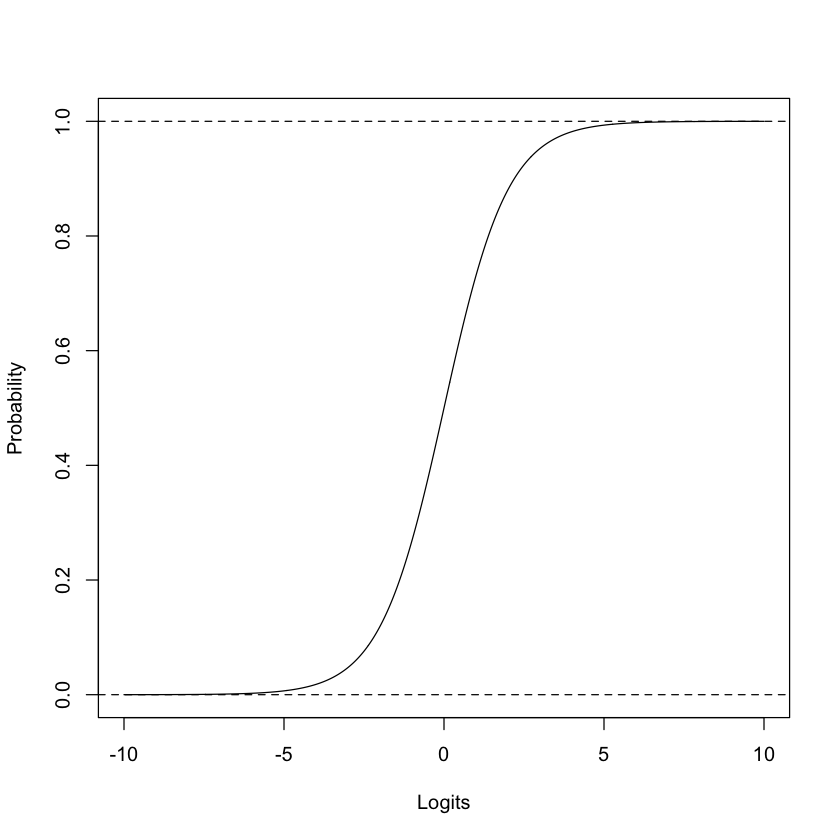

In [4]:
# Mapping real numbers on the logit scale to the probability scale
x <- seq(from = -10, to = 10, length = 999)  
y <- 1 / (1 + exp(-x))  # same as y <- plogis(x) or y <- exp(x) / (1 + exp(x))
plot(x, y, type = "l", xlab = "Logits", ylab = "Probability")
abline(h = c(0, 1), lty = 2)

In [5]:
# Fit a generalized linear model (GLM); a logistic regression model, in this case
better.fit <- glm(chd ~ height + cigs, data = wcgs, family = binomial(link = "logit"))
summary(better.fit)


Call:
glm(formula = chd ~ height + cigs, family = binomial(link = "logit"), 
    data = wcgs)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.50161    1.84186  -2.444   0.0145 *  
height       0.02521    0.02633   0.957   0.3383    
cigs         0.02313    0.00404   5.724 1.04e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1781.2  on 3153  degrees of freedom
Residual deviance: 1749.0  on 3151  degrees of freedom
AIC: 1755

Number of Fisher Scoring iterations: 5


In [6]:
# Comparing models (analogous to general linear F-test for comparing nested linear models)
fit0 <- glm(chd ~ 1, family = binomial(link = "logit" ), data = wcgs)
fit3 <- glm(chd ~ height + cigs, family = binomial(link = "logit" ), data = wcgs)

# What statistical hypothesis is being tested here?
anova(fit3, fit0, test = "Chi")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3151,1749.049,NA,NA,NA
2,3153,1781.244,-2,-32.19451,1.02106e-07


## Effect visualization

In [10]:
summary(better.fit)


Call:
glm(formula = chd ~ height + cigs, family = binomial(link = "logit"), 
    data = wcgs)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.50161    1.84186  -2.444   0.0145 *  
height       0.02521    0.02633   0.957   0.3383    
cigs         0.02313    0.00404   5.724 1.04e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1781.2  on 3153  degrees of freedom
Residual deviance: 1749.0  on 3151  degrees of freedom
AIC: 1755

Number of Fisher Scoring iterations: 5


  height cigs
1     70    0
2     70    1
3     70    2
4     70    3
5     70    4
6     70    5


1         2         3         4         5         6 
-2.737069 -2.713941 -2.690814 -2.667687 -2.644559 -2.621432

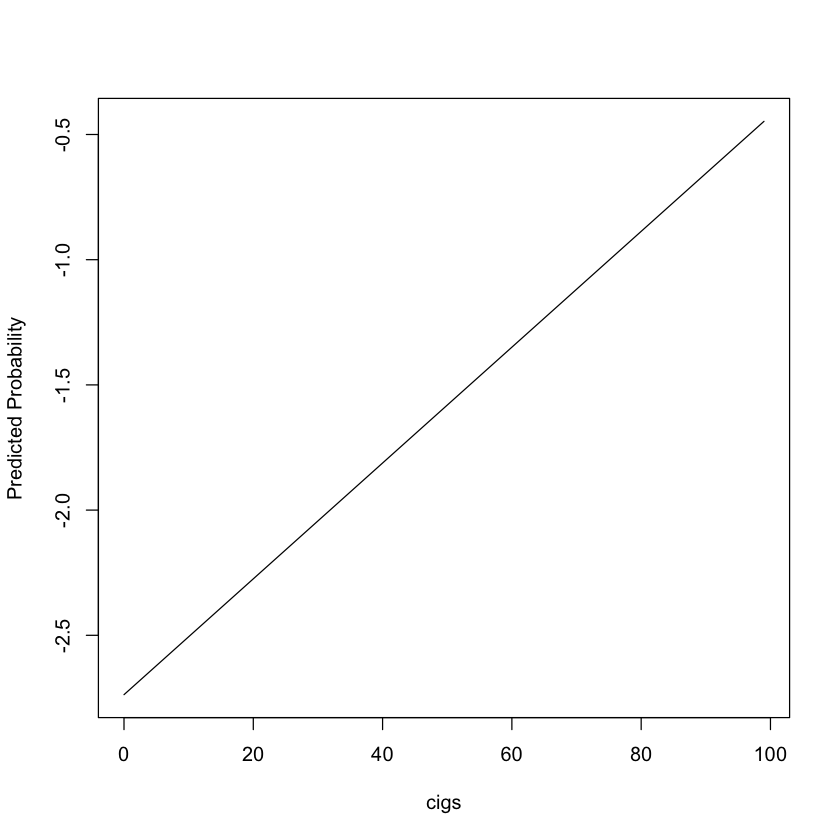

In [8]:
# Let's visualize the effect of height on the probability scale while holding cigs constant
newd <- data.frame("height" = 70, "cigs" = 0:99)
print(head(newd))
head(pred <- predict(better.fit, newdata = newd, type = "link"))
plot(newd$cigs, pred, type = "l", xlab = "cigs", ylab = "Predicted Probability")

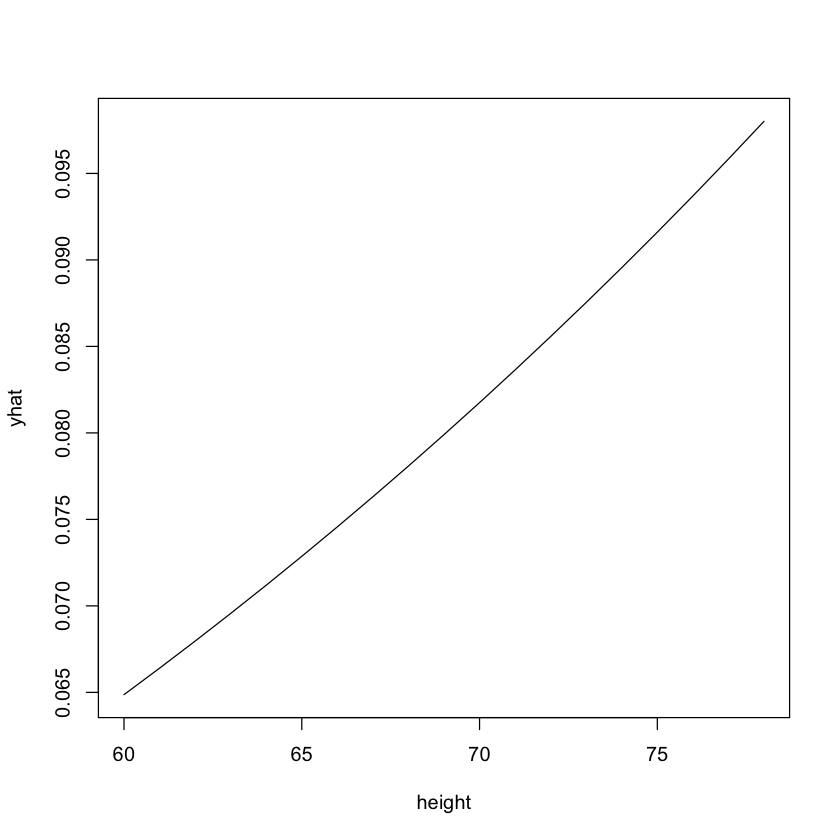

In [9]:
library(pdp)

# Prediction wrapper that tells `pdp::partial()` how to compute predictions from given model
pfun <- function(object, newdata) {
  mean(predict(object, newdata = newdata, type = "response"))
}

# Compute (approximate) partial dependence
pd <- partial(better.fit, pred.var = "height", pred.fun = pfun)
plot(pd, type = "l")

In [ ]:
pd2 <- partial(better.fit, pred.var = c("height", "cigs"), chull = TRUE, pred.fun = pfun, progress = "text")
lattice::wireframe(yhat ~ height * cigs, data = pd2, shade = TRUE)

## Variable selection

In [ ]:
# Backward elimination
fit.back <- MASS::stepAIC(better.fit, direction = "backward")
coef(fit.back)

In [ ]:
# Forward selection
fit.forw <- MASS::stepAIC(fit0, direction = "forward")
coef(fit.forw)

In [ ]:
# WTF?

## Optimization (Under the hood)

In [ ]:
# Response (as a binary 0/1 variable)
y <- wcgs$y

# Model matrix; includes a column for the intercept by default
X <- model.matrix(~ height + cigs, data = wcgs)

# Function to compute the negative log-likelihood (as a function of the betas)
nll <- function(beta) {
  lp <- X %*% beta
  -sum(y * lp - log(1 + exp(lp)))
}

# Use general optimization
optim(coef(wrong.fit), fn = nll, 
      control = list("maxit" = 9999, "reltol" = 1e-20))